## Option 1: Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

### JESSICA'S DESCRIPTION OF THREE OBSERVABLE TRENDS
1. Driver count in Rural areas is substantially smaller than Urban and Suburban areas and number of rides is much lower than Suburban and Urban areas. Due to much higher average fares, might be worth creating incentives to get more drivers to sign-up in rural cities (either new or Urban/Suburban changing to Rural), especially in the cities with the smallest number of drivers, but highest average fare.
2. In the Urban cities, the driver count is much higher so better coverage across total ride count range when compared against Suburban and Rural driver counts. Another opportunity to consider incentiving more new drivers or for Urban drivers to shift to Rural and Suburban areas.
3. Due to dense driver coverage of Urban areas and a lower average fare than Rural and Suburban areas, would be worth while to explore options for trying to create a demand for rides with higher average fares in the Urban areas. This could mean partnerships with popular destinations, marketing ads, distance-based rewards programs. On the flip side, a frequency-based rewards program might work for Rural and Suburban areas as an attempt to increase ride count by city.

In [287]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"


In [288]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [289]:
# Combine the data into a single dataset 
combined_data = pd.merge(city_data, ride_data, how="outer", on="city")
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [290]:
clean_combined_data = combined_data.rename(columns={"city":"City", 
                                             "driver_count":"Driver Count",
                                             "type":"Type",
                                             "date":"Date",
                                             "fare":"Fare",
                                             "ride_id":"Ride ID"})

In [291]:
# Display the data table for preview
clean_combined_data.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [292]:
# Group the data by city type
urban_group = clean_combined_data.loc[clean_combined_data["Type"] == "Urban"]
suburban_group = clean_combined_data.loc[clean_combined_data["Type"] == "Suburban"]
rural_group = clean_combined_data.loc[clean_combined_data["Type"] == "Rural"]

In [293]:
# Find total number of rides (per city)
urban_total_rides = urban_group.groupby("City")["Ride ID"].count()
suburban_total_rides = suburban_group.groupby("City")["Ride ID"].count()
rural_total_rides = rural_group.groupby("City")["Ride ID"].count()

In [294]:
# Find average fare per city
urban_avg_fare = urban_group.groupby("City")["Fare"].mean()
suburban_avg_fare = suburban_group.groupby("City")["Fare"].mean()
rural_avg_fare = rural_group.groupby("City")["Fare"].mean()

In [295]:
# Find total number of drivers per city
urban_total_drivers = urban_group.groupby("City")["Driver Count"].mean()
suburban_total_drivers = suburban_group.groupby("City")["Driver Count"].mean()
rural_total_drivers = rural_group.groupby("City")["Driver Count"].mean()

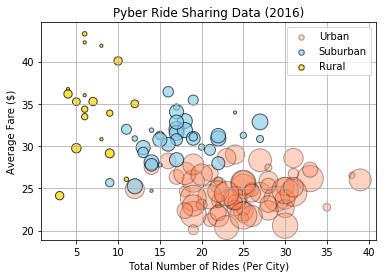

In [296]:
# Build the scatter plots for each city types
plt.scatter(urban_total_rides, urban_avg_fare, label="Urban", s=urban_total_drivers*10, color="coral", edgecolor="black", linewidths=1, alpha=0.35)
plt.scatter(suburban_total_rides, suburban_avg_fare, label="Suburban", s=suburban_total_drivers*10, color="skyblue", edgecolor="black", linewidths=1, alpha=0.65)
plt.scatter(rural_total_rides, rural_avg_fare, label="Rural", s=rural_total_drivers*10, color="gold", edgecolor="black", linewidths=1, alpha=0.75)

# Add a legend
legend = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Add a title and axis labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add grids
plt.grid()

# Show plot
plt.show()

In [297]:
# Save Figure
plt.savefig("Unit5_PyberBubblePlot.png")

<Figure size 432x288 with 0 Axes>

In [298]:
# Show plot 
plt.show()

## Total Fares by City Type

In [299]:
total_fares_grouped = clean_combined_data.groupby("Type")["Fare"]
total_fares_grouped.sum()

Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [300]:
total_fares = 39854.38 + 19356.33 + 4327.93
total_fares

63538.64

In [301]:
# Establish labels, sizes, colors
labels = ["Urban", "Suburban", "Rural"]
sizes = [39854.38, 19356.33, 4327.93]
colors = ["lightcoral", "skyblue", "gold"]
explode = (0.1, 0, 0)

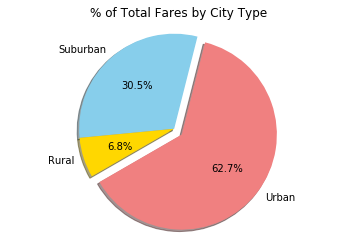

In [302]:
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-150)
plt.axis("equal")

# Add title
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Unit5_TotalFaresPieChart")

## Total Rides by City Type

In [303]:
total_rides_grouped = clean_combined_data.groupby("Type")["Ride ID"]
total_rides_grouped.count()

Type
Rural        125
Suburban     625
Urban       1625
Name: Ride ID, dtype: int64

In [304]:
total_rides = 125 + 625 + 1625
total_rides

2375

In [305]:
# Establish labels, sizes, colors
labels = ["Urban", "Suburban", "Rural"]
sizes = [1625, 625, 125]
colors = ["lightcoral", "skyblue", "gold"]
explode = (0.1, 0, 0)

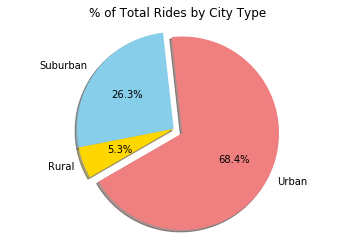

In [306]:
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-150)
plt.axis("equal")

# Add title
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Unit5_TotalRidesPieChart")

## Total Drivers by City Type

In [307]:
total_drivers_grouped = clean_combined_data.groupby("Type")["Driver Count"]
total_drivers_grouped.sum()

Type
Rural         537
Suburban     8570
Urban       59602
Name: Driver Count, dtype: int64

In [308]:
total_drivers = 537 + 8570 + 59602
total_drivers

68709

In [309]:
# Establish labels, sizes, colors
labels = ["Urban", "Suburban", "Rural"]
sizes = [59602, 8570, 537]
colors = ["lightcoral", "skyblue", "gold"]
explode = (0.1, 0, 0)

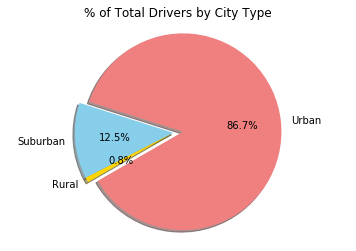

In [310]:
# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-150)
plt.axis("equal")

# Add title
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Unit5_TotalDriversPieChart")